In [205]:
import numpy as np

from py.simulation import *
from py.estimation import *
from py.features import *
from py.utils import *

from importlib import reload

from matplotlib import pyplot as plt

In [586]:
n = 50

n_rounds = 5000
lam = .95
beta = np.array([.74, 0])

In [587]:
A0 = np.ones((n,n)) + .01*np.random.randint(2, size = (n,n))

T = simulate(A0, 
             n_rounds = n_rounds, 
             lam = lam, 
             feature = lambda A: degree_quadratic_feature(A), 
             beta = beta, 
             m_updates = 400, 
             method = 'deterministic')

A = state_matrix(T, A0 = A0, lam = lam)

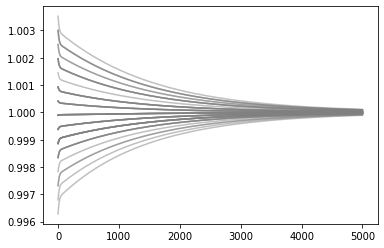

In [588]:
S = degree_quadratic_feature(A)

GAMMA = softmax(S, beta).sum(axis = 1)

# GAMMA = np.sort(GAMMA, axis = 1)
p = plt.plot(GAMMA, color = 'grey', alpha = .5)

So, theory suggests here that the critical value in $\beta_1$ should lie at the point 

$$\beta^* = \frac{d^{1-p}}{p}\;,$$

where $d = \frac{m_\text{updates}}{n}$. This doesn't seem to give fully the right answer in the simple numerical analyses we've done here, but further exploration is called for. 

In [595]:
1/.5*8**(-.5)

0.7071067811865476